# Sentiment Analysis with NLP on Twitter

# TWITTERBOT
**The purpose of the TwitterBot Project is to raise awareness that, on social media platforms where users share their happiness, achievements, music they listen to, and movies they watch, there are also thousands of people expressing their sorrow, pain, and loneliness. After retrieving Turkish Tweets from 2022 using Twitter APIs, content that is not related to users' emotions, such as tweets about political figures, public institutions, and breaking news, was excluded from the dataset. The focus was placed solely on tweets that reflect personal emotions and respond to Twitter's "What's happening?" question. The tweets were manually labeled based on the emotions they convey, rather than by individual words. In this project, which uses Logistic Regression, a bot was developed that can perform sentiment analysis on live tweets in real time. Immediately after, the bot interacts with the owners of tweets labeled as negative through mentions on Twitter, providing them with playlists designed to offer instant morale and motivation.**

# BUSINESS PROBLEM
**Predicting the sentiment of tweets posted by Twitter users as positive, negative, or neutral based on the emotions they convey.**

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from warnings import filterwarnings
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from scipy import stats



filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

In [2]:
df = pd.read_csv("/Users/mustafaemircan/PycharmProjects/MiuulBootcamp/PROJECTS/NLP PROJECTS/TwitterBot/tweets_labeled.csv")
df.head(10)

,tweet_id,tweet,date,label
0,1606767075984375808,Berk Ali (kedim) seni çok özledim. Ölmek için ...,2022-12-24 21:41:37+00:00,1
1,1537178207677448193,"Yani, öylesine ciddiye alacaksın ki yaşamayı, ...",2022-06-15 21:00:18+00:00,1
2,1536458790802972673,saçlarının gölgesinde\nölmek ne güzeldi,2022-06-13 21:21:36+00:00,1
3,1495413883166760960,"Öyle güzel baktın ki, gözlerime\nsevmek değil ...",2022-02-20 15:03:47+00:00,1
4,1490420667614904334,sevmek biri için ölmek değil her şeye rağmen y...,2022-02-06 20:22:32+00:00,1
5,1490391945142751233,Halbuki sevmek biri için ölmek değil onun için...,2022-02-06 18:28:24+00:00,1
6,1489780520359759873,Gülmek için bir tesadüf\nBeklemenin anlamı yok...,2022-02-05 01:58:49+00:00,1
7,1608551263037435904,"✨2023’te sağlıklı,güzel kararlar,mutluluk,sept...",2022-12-29 19:51:21+00:00,1
8,1584421772166037505,Depresyon ve anksiyeteyle uğraşırken arkadaşla...,2022-10-24 05:49:22+00:00,1
9,1532802348350840836,Bisikletimdeki ledler ve ışıklı kulaklığım ile...,2022-06-03 19:12:12+00:00,1


In [3]:
df.shape

(12960, 4)

In [4]:
df["label"].value_counts()

label
 0    8449
-1    2904
 1    1607
Name: count, dtype: int64

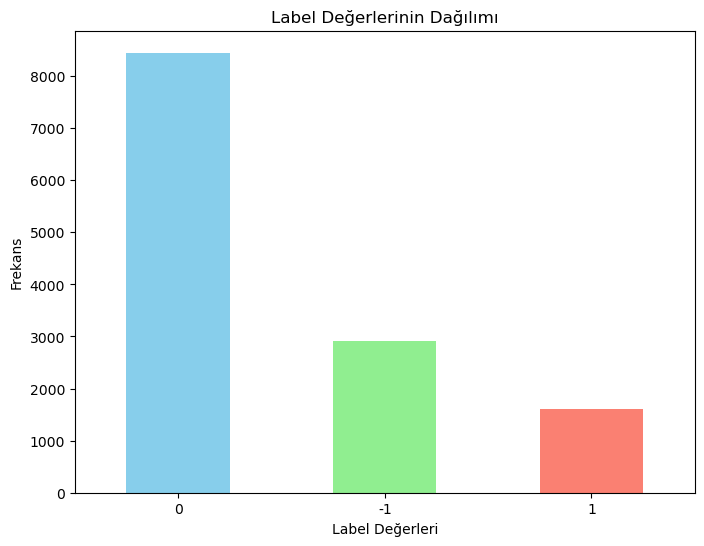

In [5]:
# Count the number of values
label_counts = df["label"].value_counts()

# Count the number of values
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])

# Graph details
plt.title('Label Değerlerinin Dağılımı')
plt.xlabel('Label Değerleri')
plt.ylabel('Frekans')
plt.xticks(rotation=0)  
plt.show()

In [6]:
df.isnull().sum()

tweet_id    0
tweet       1
date        0
label       0
dtype: int64

In [145]:
df.dropna(axis=0, inplace=True)

In [12]:
print(df['date'].head())

0    2022-12-24 21:41:37+00:00
1    2022-06-15 21:00:18+00:00
2    2022-06-13 21:21:36+00:00
3    2022-02-20 15:03:47+00:00
4    2022-02-06 20:22:32+00:00
Name: date, dtype: object


# We changed the date variable to GMT+03:00.

In [14]:
df['date'] = pd.to_datetime(df['date'])  
df['date'] = df['date'].dt.tz_convert('Etc/GMT-3')
print(df['date'].head())

0   2022-12-25 00:41:37+03:00
1   2022-06-16 00:00:18+03:00
2   2022-06-14 00:21:36+03:00
3   2022-02-20 18:03:47+03:00
4   2022-02-06 23:22:32+03:00
Name: date, dtype: datetime64[ns, Etc/GMT-3]


# Creating and Formatting the "month" Variable

In [15]:
df["month"] = df["date"].dt.month_name()

In [18]:
df["month"].value_counts()

month
December     2491
August       1349
November     1256
September    1108
October      1100
March         930
January       923
February      850
May           781
July          774
June          718
April         680
Name: count, dtype: int64

In [20]:
df["month"] = df["month"].replace({'December': 'Aralık',
                                   'January': 'Ocak',
                                   'February': 'Şubat',
                                   'March': 'Mart',
                                   'April': 'Nisan',
                                   'May': 'Mayıs',
                                   'June': 'Haziran',
                                   'July': 'Temmuz',
                                   'August': 'Ağustos',
                                   'September': 'Eylül',
                                   'October': 'Ekim',
                                   'November': 'Kasım'
                                   })

# Creating and Formatting the "seaons" Variable

In [28]:
seasons ={"Ocak": "Kış",
          "Şubat": "Kış",
          "Mart": "İlkbahar",
          "Nisan": "İlkbahar",
          "Mayıs": "İlkbahar",
          "Haziran": "Yaz",
          "Temmuz": "Yaz",
          "Ağustos": "Yaz",
          "Eylül": "Sonbahar",
          "Ekim": "Sonbahar",
          "Kasım": "Sonbahar",
          "Aralık": "Kış"}

In [29]:
df["seasons"] = df["month"].map(seasons)

In [30]:
df["seasons"].value_counts()

seasons
Kış         4264
Sonbahar    3464
Yaz         2841
İlkbahar    2391
Name: count, dtype: int64

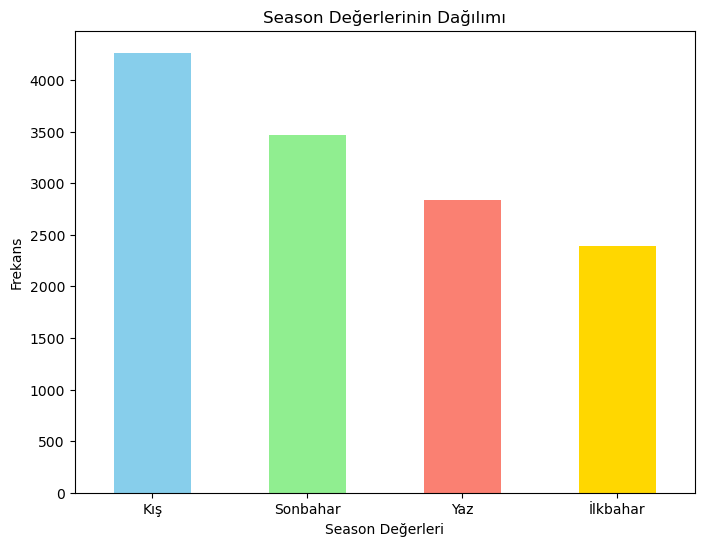

In [43]:
seasons_counts = df["seasons"].value_counts()

plt.figure(figsize=(8, 6))
seasons_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'gold'])

plt.title('Season Değerlerinin Dağılımı')
plt.xlabel('Season Değerleri')
plt.ylabel('Frekans')
plt.xticks(rotation=0)  
plt.show()

# Creating and Formatting the "days" Variable

In [34]:
df["days"] = [date.strftime('%A') for date in df["date"]]
df["days"] = df["days"].replace({"Monday" : "Pazartesi",
                                 "Tuesday" : "Salı",
                                 "Wednesday" : "Çarşamba",
                                 "Thursday": "Perşembe",
                                 "Friday" : "Cuma",
                                 "Saturday" : "Cumartesi",
                                 "Sunday": "Pazar"})

In [39]:
df["days"].value_counts()

days
Pazartesi    1912
Cuma         1909
Perşembe     1897
Pazar        1884
Salı         1883
Çarşamba     1833
Cumartesi    1642
Name: count, dtype: int64

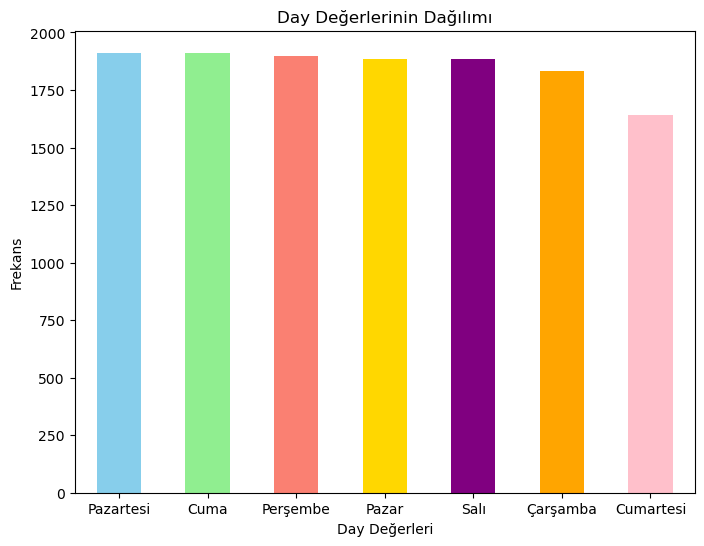

In [44]:
days_counts = df["days"].value_counts()

plt.figure(figsize=(8, 6))
days_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'gold', 'purple', 'orange', 'pink'])

plt.title('Day Değerlerinin Dağılımı')
plt.xlabel('Day Değerleri')
plt.ylabel('Frekans')
plt.xticks(rotation=0)  
plt.show()

## Dividing the Day into Six 4-Hour Intervals

In [45]:
df["hour"] = df["date"].dt.hour

In [48]:
df['4hour_interval'] = (df['hour'] // 2) * 2
interval = {0: '0-2',
            2: '2-4',
            4: '4-6',
            6: '6-8',
            8: '8-10',
            10: '10-12',
            12: '12-14',
            14: '14-16',
            16: '16-18',
            18: '18-20',
            20: '20-22',
            22: '22-24'
            }

In [49]:
df["4hour_interval"] = df["4hour_interval"].map(interval)

In [50]:
df["time_interval"] = df["4hour_interval"].replace({"0-2": "22-02",
                                                   "22-24": "22-02",
                                                   "2-4": "02-06",
                                                   "4-6": "02-06",
                                                   "6-8": "06-10",
                                                   "8-10": "06-10",
                                                   "10-12": "10-14",
                                                   "12-14": "10-14",
                                                   "14-16": "14-18",
                                                   "16-18": "14-18",
                                                   "18-20": "18-22",
                                                   "20-22": "18-22"})

In [69]:
df.drop(["4hour_interval", "hour"], axis=1, inplace=True)

In [51]:
df["4hour_interval"].value_counts()

4hour_interval
0-2      3104
22-24    1944
20-22    1432
18-20    1229
16-18     922
12-14     824
14-16     798
10-12     786
8-10      649
2-4       613
6-8       408
4-6       251
Name: count, dtype: int64

In [52]:
df["label"] = df["label"].replace({-1: "Negatif", 0: "Nötr", 1: "Pozitif"})

In [53]:
df["label"].value_counts()

label
Nötr       8449
Negatif    2904
Pozitif    1607
Name: count, dtype: int64

# Text Formatting and Cleaning

In [118]:
df["tweet"] = df["tweet"].str.lower()

In [107]:
df["tweet"] = df["tweet"].str.replace('[^\w\s]', ' ', regex=True)

In [108]:
df["tweet"] = df["tweet"].str.replace('\d', '', regex=True)

In [109]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mustafaemircan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
sw = stopwords.words("turkish")

df["tweet"] = df["tweet"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df["tweet"].head()

0    berk ali kedim seni özledim ölmek küçücüktün s...
1    öylesine ciddiye alacaksın yaşamayı yetmişinde...
2                  saçlarının gölgesinde ölmek güzeldi
3    öyle güzel baktın gözlerime sevmek değil ölmek...
4      sevmek ölmek değil şeye rağmen yaşayabilmek miş
Name: tweet, dtype: object

In [114]:
nltk.download('wordnet')
df['tweet'] = df['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df["tweet"].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mustafaemircan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    berk ali kedim seni özledim ölmek küçücüktün s...
1    öylesine ciddiye alacaksın yaşamayı yetmişinde...
2                  saçlarının gölgesinde ölmek güzeldi
3    öyle güzel baktın gözlerime sevmek değil ölmek...
4      sevmek ölmek değil şeye rağmen yaşayabilmek miş
Name: tweet, dtype: object

# Capturing Categorical and Numerical Variables

In [115]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df, car_th=25)
print("#############")
print(f"Cat_Cols : {cat_cols}")
print("#############")
print(f"Num_Cols : {num_cols}")
print("#############")
print(f"Cat_But_Car : {cat_but_car}")

Observations: 12959
Variables: 8
cat_cols: 5
num_cols: 2
cat_but_car: 1
num_but_cat: 1
#############
Cat_Cols : ['month', 'seasons', 'days', 'time_interval', 'label']
#############
Num_Cols : ['tweet_id', 'date']
#############
Cat_But_Car : ['tweet']


# Analysis of Categorical Variables with the Target Variable

In [116]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


for col in cat_cols:
    target_summary_with_cat(df, "label", col)

         TARGET_MEAN
month               
Aralık          0.92
Ağustos         0.95
Ekim            0.89
Eylül           0.90
Haziran         0.92
Kasım           0.95
Mart            0.90
Mayıs           0.85
Nisan           0.84
Ocak            0.82
Temmuz          0.90
Şubat           0.88


          TARGET_MEAN
seasons              
Kış              0.89
Sonbahar         0.92
Yaz              0.93
İlkbahar         0.87


           TARGET_MEAN
days                  
Cuma              0.90
Cumartesi         0.89
Pazar             0.90
Pazartesi         0.91
Perşembe          0.92
Salı              0.87
Çarşamba          0.91


               TARGET_MEAN
time_interval             
02-06                 0.80
06-10                 0.98
10-14                 0.90
14-18                 0.89
18-22                 0.85
22-02                 0.93


       TARGET_MEAN
label             
0             0.00
1             1.00
2             2.00




# Analysis of Numerical Variables with the Target Variable

count                 12959.00
mean    1554231054107931392.00
std       41062993224116944.00
min     1477067251597590528.00
5%      1484663018211268608.00
10%     1492807154913619968.00
20%     1507848891240242432.00
30%     1527742498586897664.00
40%     1548040388326077952.00
50%     1560629233680289792.00
60%     1571973458672241920.00
70%     1585680608470106112.00
80%     1597250728057323520.00
90%     1606417896792431104.00
95%     1607882493423359232.00
99%     1608855401121859072.00
max     1608967619062923264.00
Name: tweet_id, dtype: float64
Skewness: -0.32
Kurtosis: -1.20


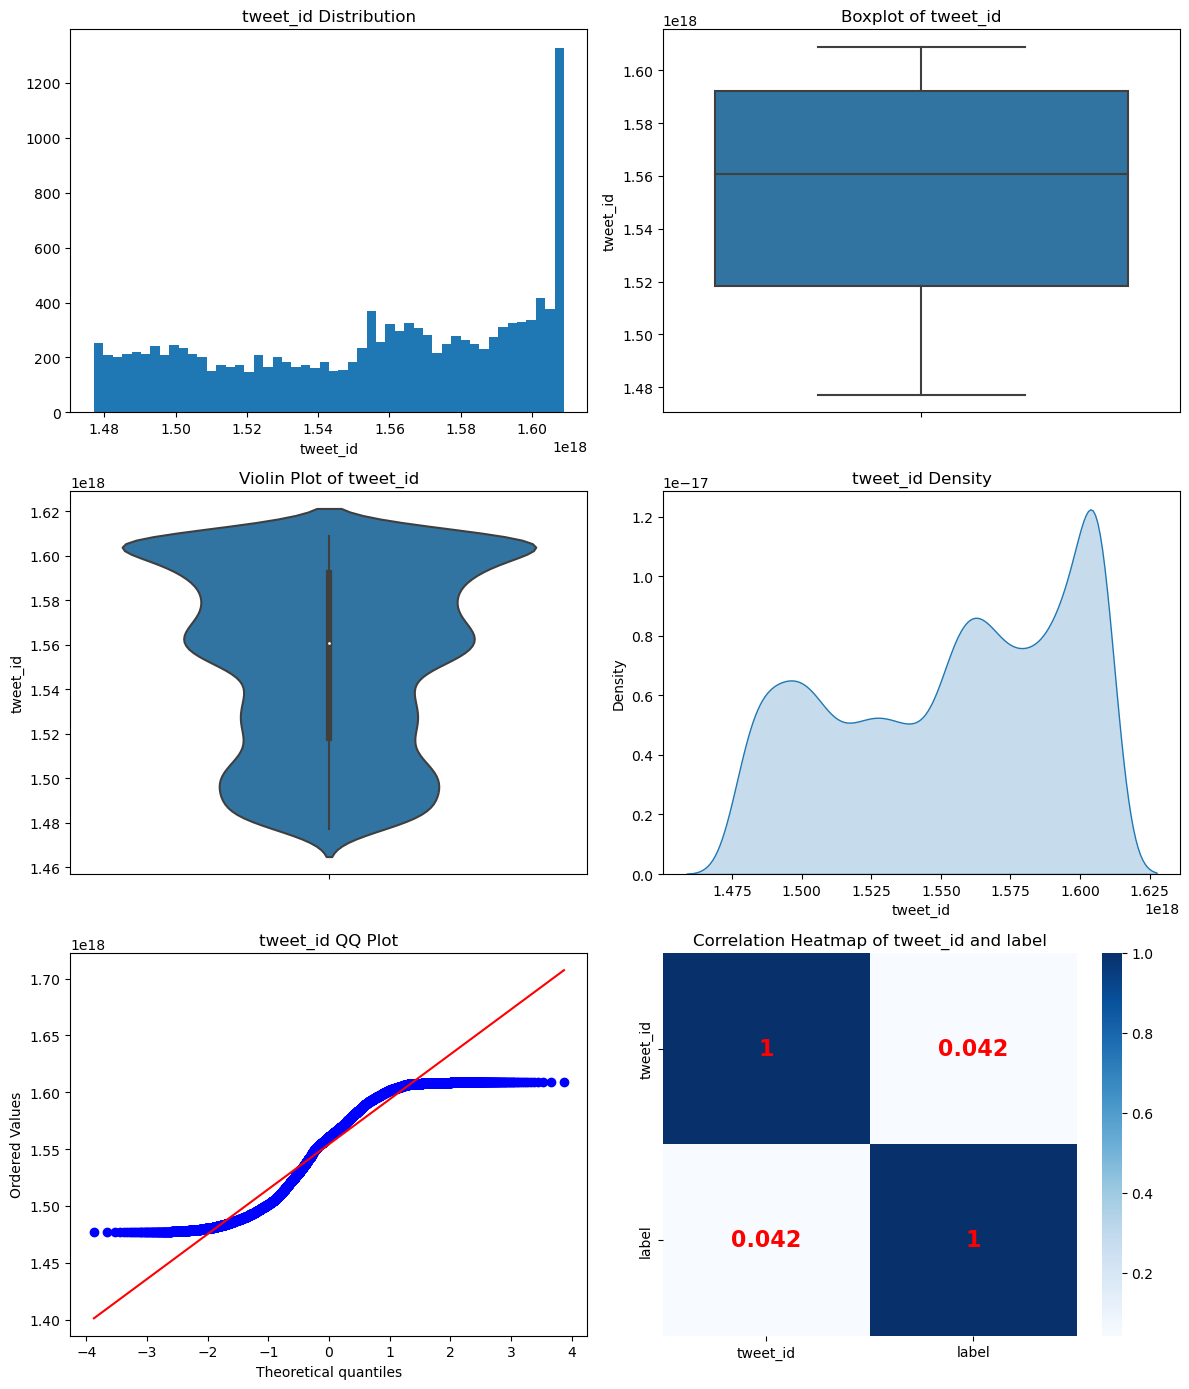

#####################################


In [117]:
def num_summary(dataframe, numerical_col, plot=False, target_col=None):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    desc = dataframe[numerical_col].describe(quantiles)
    skewness = dataframe[numerical_col].skew()
    kurtosis = dataframe[numerical_col].kurtosis()

    print(desc)
    print(f"Skewness: {skewness:.2f}")
    print(f"Kurtosis: {kurtosis:.2f}")

    if plot:
        fig, axs = plt.subplots(3, 2, figsize=(12, 14))

        # Histogram
        axs[0, 0].hist(dataframe[numerical_col], bins=50)
        axs[0, 0].set_xlabel(numerical_col)
        axs[0, 0].set_title(numerical_col + ' Distribution')

        # Boxplot
        sns.boxplot(y=numerical_col, data=dataframe, ax=axs[0, 1])
        axs[0, 1].set_title("Boxplot of " + numerical_col)

        # Violin Plot
        sns.violinplot(y=numerical_col, data=dataframe, ax=axs[1, 0])
        axs[1, 0].set_title("Violin Plot of " + numerical_col)

        # Density Plot
        sns.kdeplot(dataframe[numerical_col], shade=True, ax=axs[1, 1])
        axs[1, 1].set_xlabel(numerical_col)
        axs[1, 1].set_title(numerical_col + ' Density')

        # QQ Plot
        stats.probplot(dataframe[numerical_col], dist="norm", plot=axs[2, 0])
        axs[2, 0].set_title(numerical_col + ' QQ Plot')

        # Correlation Heatmap
        corr = dataframe[[numerical_col, target_col]].corr()
        sns.heatmap(corr, annot=True, cmap='Blues', ax=axs[2, 1],
                    annot_kws={"size": 16, "weight": "bold", "color": "red"})
        axs[2, 1].set_title(f'Correlation Heatmap of {numerical_col} and {target_col}')

        plt.tight_layout()
        plt.show()

    print("#####################################")

for col in num_cols[:-1]:
    num_summary(df, col, plot=True, target_col="label")

# LabelEncoding
- 0 = negative  
- 1 = neutral  
- 2 = positive  

In [119]:
df["label"] = LabelEncoder().fit_transform(df["label"])

In [120]:
df["label"].value_counts()

label
1    8448
0    2904
2    1607
Name: count, dtype: int64

# TF-IDF MATRIX

In [122]:
vectorizer = TfidfVectorizer()

In [123]:
X = vectorizer.fit_transform(df["tweet"])
y = df["label"]

# LOGISTIC REGRESSION

In [124]:
log_model = LogisticRegression().fit(X, y)

In [125]:
cross_val_score(log_model, X, y, cv=10, scoring="accuracy").mean()

0.6654838171504838

# Loading the dataset we will predict.

In [126]:
df_new = pd.read_csv("/Users/mustafaemircan/PycharmProjects/MiuulBootcamp/PROJECTS/NLP PROJECTS/TwitterBot/tweets_21.csv")
df_new.head()

,tweet_id,tweet,date
0,1344798002490314752,Kardesim (12) sevdigi cocuga 00:00 da ilan-i a...,2021-01-01 03:10:03
1,1344799527673470977,Bu yılbaşı da saat tam 00:00'da swni seviyorum...,2021-01-01 03:16:07
2,1344799907719348226,tam 00.00da naptınız ben her yıl tam bu vakit ...,2021-01-01 03:17:37
3,1344800782802165762,00:00'da havai fişek gösterisi yapıldı tam dib...,2021-01-01 03:21:06
4,1344805589990453249,31 aralık saat 00.00 da yeni yılımızı kutlayan...,2021-01-01 03:40:12


# Text Formatting and Cleaning

In [128]:
df_new["tweet"] = df["tweet"].str.lower()

In [129]:
df["tweet"] = df["tweet"].str.replace('[^\w\s]', ' ', regex=True)

In [130]:
df["tweet"] = df["tweet"].str.replace('\d', '', regex=True)

In [131]:
import nltk

nltk.download("stopwords")
sw = stopwords.words("turkish")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mustafaemircan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [132]:
df["tweet"] = df["tweet"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df["tweet"].head()

0    berk ali kedim seni özledim ölmek küçücüktün s...
1    öylesine ciddiye alacaksın yaşamayı yetmişinde...
2                  saçlarının gölgesinde ölmek güzeldi
3    öyle güzel baktın gözlerime sevmek değil ölmek...
4      sevmek ölmek değil şeye rağmen yaşayabilmek miş
Name: tweet, dtype: object

In [133]:
nltk.download('wordnet')
df['tweet'] = df['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df["tweet"].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mustafaemircan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    berk ali kedim seni özledim ölmek küçücüktün s...
1    öylesine ciddiye alacaksın yaşamayı yetmişinde...
2                  saçlarının gölgesinde ölmek güzeldi
3    öyle güzel baktın gözlerime sevmek değil ölmek...
4      sevmek ölmek değil şeye rağmen yaşayabilmek miş
Name: tweet, dtype: object

In [138]:
df_new.dropna(axis=0, inplace=True)

# Applying TF-IDF to our prediction dataset.

In [139]:
tweet_tf_idf = vectorizer.transform(df_new["tweet"])

# PREDICTIONS

In [140]:
predictions = log_model.predict(tweet_tf_idf)

In [141]:
df_new["label"] = predictions

In [142]:
df_new.head()

,tweet_id,tweet,date,label
0,1344798002490314752,berk ali kedim seni özledim ölmek küçücüktün s...,2021-01-01 03:10:03,2
1,1344799527673470977,öylesine ciddiye alacaksın yaşamayı yetmişinde...,2021-01-01 03:16:07,1
2,1344799907719348226,saçlarının gölgesinde ölmek güzeldi,2021-01-01 03:17:37,1
3,1344800782802165762,öyle güzel baktın gözlerime sevmek değil ölmek...,2021-01-01 03:21:06,1
4,1344805589990453249,sevmek ölmek değil şeye rağmen yaşayabilmek miş,2021-01-01 03:40:12,1


# NOTE : 
- 0 = negative  
- 1 = neutral  
- 2 = positive  

In [143]:
df_new["label"].value_counts()

label
1    10572
0     1631
2      756
Name: count, dtype: int64

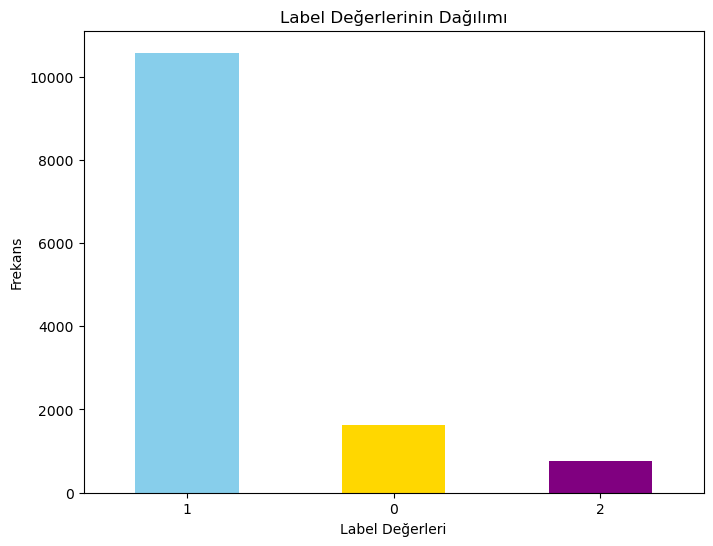

In [144]:
label_counts = df_new["label"].value_counts()

plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['skyblue', 'gold', 'purple'])

plt.title('Label Değerlerinin Dağılımı')
plt.xlabel('Label Değerleri')
plt.ylabel('Frekans')
plt.xticks(rotation=0)  
plt.show()

# THANKS.